# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [895]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime as datetime

%matplotlib inline

In [896]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [897]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [898]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income =

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [899]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [900]:
# Using the Python requests library, make an API call to access the current price of BTC
# YOUR CODE HERE
btc_response = requests.get(btc_url).json()
                            
# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(btc_response, indent= 3, sort_keys=True))

{
   "data": {
      "1": {
         "circulating_supply": 19193831,
         "id": 1,
         "last_updated": 1667171981,
         "max_supply": 21000000,
         "name": "Bitcoin",
         "quotes": {
            "USD": {
               "market_cap": 394978845933,
               "percent_change_1h": 0.20700515907305,
               "percent_change_24h": -0.904072751296331,
               "percent_change_7d": 7.18833782898291,
               "percentage_change_1h": 0.20700515907305,
               "percentage_change_24h": -0.904072751296331,
               "percentage_change_7d": 7.18833782898291,
               "price": 20584.0,
               "volume_24h": 24515078914
            }
         },
         "rank": 1,
         "symbol": "BTC",
         "total_supply": 19193831,
         "website_slug": "bitcoin"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3116,
      "timestamp": 1667171981
   }
}


In [901]:
# Using the Python requests library, make an API call to access the current price ETH
# YOUR CODE HERE
eth_response = requests.get(eth_url).json()
# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(eth_response, indent= 3, sort_keys=True))

{
   "data": {
      "1027": {
         "circulating_supply": 120522144,
         "id": 1027,
         "last_updated": 1667171984,
         "max_supply": 120522144,
         "name": "Ethereum",
         "quotes": {
            "USD": {
               "market_cap": 191075818910,
               "percent_change_1h": 0.453674855534647,
               "percent_change_24h": -1.72049316019619,
               "percent_change_7d": 20.6530419521318,
               "percentage_change_1h": 0.453674855534647,
               "percentage_change_24h": -1.72049316019619,
               "percentage_change_7d": 20.6530419521318,
               "price": 1585.1,
               "volume_24h": 10310032073
            }
         },
         "rank": 2,
         "symbol": "ETH",
         "total_supply": 120522144,
         "website_slug": "ethereum"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3116,
      "timestamp": 1667171984
   }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [902]:
# Navigate the BTC response object to access the current price of BTC
# YOUR CODE HERE
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
# YOUR CODE HERE
print(f"The current price of BTC is ${btc_price:.2f}")

The current price of BTC is $20584.00


In [903]:
# Navigate the BTC response object to access the current price of ETH
# YOUR CODE HERE
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]
                         
# Print the current price of ETH
# YOUR CODE HERE
print(f"The current price of ETH is ${eth_price:.2f}")

The current price of ETH is $1585.10


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [904]:
# Compute the current value of the BTC holding 
# YOUR CODE HERE
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
# YOUR CODE HERE
print(f"The current value of your BTC holding is ${btc_value:.2f}")

The current value of your BTC holding is $24700.80


In [905]:
# Compute the current value of the ETH holding 
# YOUR CODE HERE
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
# YOUR CODE HERE
print(f"The current value of your ETH holding is ${eth_value:.2f}")

The current value of your ETH holding is $8401.03


In [906]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
# YOUR CODE HERE
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f"The total value of the cryptocurrency wallet is ${total_crypto_wallet:.2f}")

The total value of the cryptocurrency wallet is $33101.83


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in ETF Funds.

In [907]:
# Current amount of shares held in the ETF portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [908]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
# YOUR CODE HERE
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [909]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE
tickers = ["SPY","AGG"]

# Set timeframe to 1Day
# YOUR CODE HERE
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
# YOUR CODE HERE
start_date = pd.Timestamp("2022-10-26", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-10-26", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [910]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start= start_date,
    end= end_date
).df
    
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE
prices_df = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
prices_df.head()

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2022-10-26 04:00:00+00:00  94.78  95.17  94.76  94.98  7836932       26772   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2022-10-26 04:00:00+00:00  94.951876  381.62  387.58  381.35  382.02   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2022-10-26 04:00:00+00:00  103779972      657066  383.877161

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [911]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
# YOUR CODE HERE
agg_close_price = float(prices_df["AGG"]["close"])
                        
# Print the AGG closing price
# YOUR CODE HERE
print(f"AGG close price is: ${agg_close_price:.2f}")

AGG close price is: $94.98


In [912]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
# YOUR CODE HERE
spy_close_price = float(prices_df["SPY"]["close"])

# Print the SPY closing price
# YOUR CODE HERE
print(f'SPY closing price is: ${spy_close_price:.2f}')

SPY closing price is: $382.02


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [913]:
# Calculate the current value of the bond portion of the portfolio
# YOUR CODE HERE
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
# YOUR CODE HERE
print(f"The current value of the bond portfolio is ${agg_value:.2f}")

The current value of the bond portfolio is $18996.00


In [914]:
# Calculate the current value of the stock portion of the portfolio
# YOUR CODE HERE
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
# YOUR CODE HERE
print(f"The current value of the stock portfolio is ${spy_value:.2f}")

The current value of the stock portfolio is $42022.20


In [915]:
# Calculate the total value of the stock and bond portion of the portfolio
# YOUR CODE HERE
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
print(f"The current balance of the stock and bond portfolio is ${total_stocks_bonds:.2f}")

The current balance of the stock and bond portfolio is $61018.20


In [916]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
# YOUR CODE HERE
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f"The current value of the total portfolio is ${total_portfolio:.2f}")
print(f"The current cryptocurrency wallet balance is ${total_crypto_wallet:.2f}")

The current value of the total portfolio is $94120.03
The current cryptocurrency wallet balance is $33101.83


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [917]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE
savings_data = ["Total cryptocurrency", "Total Stocks/bonds"]
# Review the Python list savings_data
# YOUR CODE HERE
savings_data

['Total cryptocurrency', 'Total Stocks/bonds']

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [918]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE
savings_df = pd.DataFrame(
    {"Amount": [total_crypto_wallet, total_stocks_bonds]},
    index=savings_data
)
# Display the savings_df DataFrame
# YOUR CODE HERE
savings_df

,Amount
Total cryptocurrency,33101.83
Total Stocks/bonds,61018.20


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition - Cryptocurrency and Stocks/Bonds'}, ylabel='Amount'>

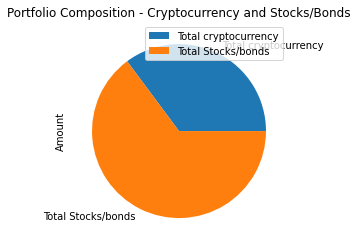

In [919]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE
savings_df.plot.pie(
    y="Amount",
    title="Portfolio Composition - Cryptocurrency and Stocks/Bonds")

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [920]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE
emergency_fund_value = monthly_income * 3
emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [921]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
if total_portfolio > emergency_fund_value:
    print("Congratulations! You have enough money in this fund.")
# YOUR CODE HERE
elif total_portfolio == emergency_fund_value:
    print("Congratulations! You have reached an important financial goal of having a 3 month emergency fund reserve")
# YOUR CODE HERE
elif total_portfolio < emergency_fund_value:
    print(f"You will need more ${emergency_fund_value-total_portfolio} to reach your emergency fund goal")

Congratulations! You have enough money in this fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [922]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
today = str(datetime.datetime.now()).split()[0]
three_year_back = str(datetime.datetime.now() - datetime.timedelta(days=3*365)).split()[0]

# YOUR CODE HERE
start_date_three_year_back = pd.Timestamp(three_year_back, tz= "America/New_York").isoformat()
end_date = pd.Timestamp(today, tz= "America/New_York").isoformat()
start_date_three_year_back, end_date

('2019-10-31T00:00:00-04:00', '2022-10-30T00:00:00-04:00')

In [923]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start= start_date_three_year_back,
    end= end_date).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE
prices_df = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])
# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
# YOUR CODE HERE
print(prices_df.head())
print(prices_df.tail())

                              AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2019-10-31 04:00:00+00:00  112.98  113.300  112.890  113.15  5416778   
2019-11-01 04:00:00+00:00  112.98  113.105  112.805  112.93  4001678   
2019-11-04 05:00:00+00:00  112.71  112.720  112.590  112.65  2723845   
2019-11-05 05:00:00+00:00  112.35  112.380  112.150  112.23  3766399   
2019-11-06 05:00:00+00:00  112.40  112.510  112.260  112.40  3908982   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2019-10-31 04:00:00+00:00       16070  113.175644  304.12  304.1300  301.73   
2019-11-01 04:00:00+00:00       17210  112.927582  304.92  306.1900  304.74   
2019-11-04 05:00:00+00:00   

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [924]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE
monte_carlo_simulation = MCSimulation(
    portfolio_data= prices_df,
    weights=[.60,.40],
    num_simulation= 500,
    num_trading_days= 252 * 30)

# Review the simulation input data
# YOUR CODE HERE
monte_carlo_simulation.portfolio_data.head()

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2019-10-31 04:00:00+00:00  112.98  113.300  112.890  113.15  5416778   
2019-11-01 04:00:00+00:00  112.98  113.105  112.805  112.93  4001678   
2019-11-04 05:00:00+00:00  112.71  112.720  112.590  112.65  2723845   
2019-11-05 05:00:00+00:00  112.35  112.380  112.150  112.23  3766399   
2019-11-06 05:00:00+00:00  112.40  112.510  112.260  112.40  3908982   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-10-31 04:00:00+00:00       16070  113.175644          NaN  304.12   
2019-11-01 04:00:00+00:00       17210  112.927582    -0.001944  304.92   
2019-11-04 05:00:00+00:00       11743  112.644988    -0.002479  307.86   
2019-11-05 05:00:00+00:00       10707  112.237379    -0.003728  307.59   
2019-11-06 05:00:00+00:00       11879  112.416874     0.001515  307.03   

                                                                           \
                               high     low   close    volume trade_count   
timestamp                                                                   
2019-10-31 04:00:00+00:00  304.1300  301.73  303.33  68989134      319480   
2019-11-01 04:00:00+00:00  306.1900  304.74  306.17  71142015      321897   
2019-11-04 05:00:00+00:00  308.0000  306.96  307.37  60606916      217934   
2019-11-05 05:00:00+00:00  307.9195  306.71  307.04  42955771      210376   
2019-11-06 05:00:00+00:00  307.4000  306.06  307.07  46487108      217559   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-10-31 04:00:00+00:00  302.777857          NaN  
2019-11-01 04:00:00+00:00  305.482057     0.009363  
2019-11-04 05:00:00+00:00  307.058902     0.003919  
2019-11-05 05:00:00+00:00  307.186604    -0.001074  
2019-11-06 05:00:00+00:00  306.885517     0.000098

In [925]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
monte_carlo_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 110.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 120.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 130.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 140.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 150.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 160.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 170.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 180.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 190.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 200.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 210.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 220.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 230.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 240.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 250.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 260.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 270.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 280.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 290.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 300.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 310.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 320.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 330.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 340.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 350.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 360.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 370.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 380.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 390.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 400.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 410.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 420.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 430.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 440.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 450.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 460.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 470.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 480.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 490.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011466,0.999127,1.008639,0.995226,0.995790,1.003643,1.001253,0.991516,0.997447,0.993499,...,0.996623,0.988752,1.002095,1.014372,1.001631,0.994146,0.991827,0.991448,1.001654,0.985645
2,1.000675,0.991246,1.012670,1.005517,0.999875,1.017630,1.001759,0.992909,0.996984,0.992866,...,0.996489,0.999773,1.012588,1.006879,0.999438,0.991705,0.993258,0.995345,0.995754,0.978676
3,0.999916,0.997101,1.008214,0.992636,1.001333,1.011666,0.998751,0.986626,0.995234,0.986548,...,0.992183,1.004158,1.003419,1.011412,1.002421,1.000536,0.974214,0.997396,0.999756,0.978453
4,0.994115,0.992259,0.992103,0.996480,0.993634,1.012997,1.002586,0.994554,0.978948,0.986052,...,0.993819,1.004395,1.012721,1.005550,1.004930,0.997936,0.973218,0.986904,1.006724,0.968546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.970872,1.292590,1.601099,2.007083,1.846280,1.360136,0.882613,1.488800,0.513807,2.020280,...,1.574792,1.526711,1.412803,0.750007,0.955515,1.693519,1.365797,1.603325,1.407171,0.551222
7557,0.966872,1.289948,1.602945,2.010295,1.840462,1.346858,0.890069,1.493151,0.511140,2.019658,...,1.570914,1.522754,1.402249,0.751855,0.955289,1.680064,1.359748,1.621075,1.396127,0.551637
7558,0.966821,1.280774,1.611126,1.997423,1.837183,1.348760,0.883081,1.500560,0.515531,2.030019,...,1.586653,1.511387,1.391005,0.753163,0.958405,1.688496,1.349636,1.619288,1.403053,0.545238
7559,0.955544,1.273198,1.620585,1.998886,1.844014,1.356858,0.883825,1.506631,0.509646,2.049142,...,1.570755,1.507531,1.393974,0.757743,0.948580,1.693021,1.357087,1.611730,1.402049,0.549823


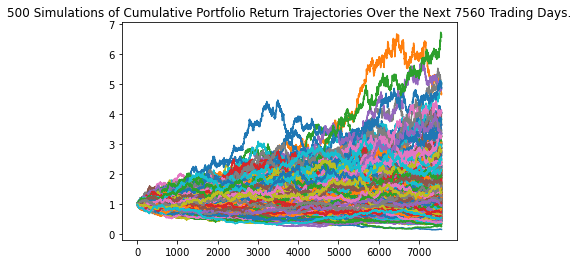

In [926]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
mc_line_plot = monte_carlo_simulation.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

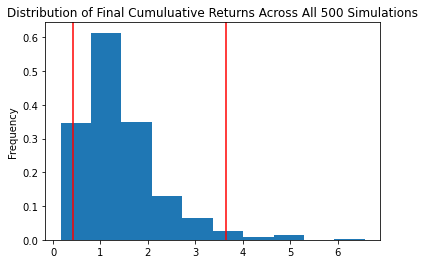

In [927]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
mc_distribution_plot = monte_carlo_simulation.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [928]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
monte_carlo_stats =monte_carlo_simulation.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE
print(monte_carlo_stats)

count           500.000000
mean              1.418715
std               0.841624
min               0.156807
25%               0.864706
50%               1.231473
75%               1.702375
max               6.577233
95% CI Lower      0.424585
95% CI Upper      3.642423
Name: 7560, dtype: float64


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [929]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(f"The current balance of the stock and bond portion of the members portfolio is ${total_stocks_bonds: .2f}")

The current balance of the stock and bond portion of the members portfolio is $ 61018.20


In [930]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# YOUR CODE HERE
# YOUR CODE HERE
ci_lower_thirty_cumulative_return = monte_carlo_stats[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = monte_carlo_stats[9] * total_stocks_bonds

# Print the result of your calculations
# YOUR CODE HERE
print(f" The lower `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio is ${ci_lower_thirty_cumulative_return :,.2f}")
print(f" The upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio is ${ci_upper_thirty_cumulative_return :,.2f}")

print(f"There is a 95% chance that investing the Stock/Bond portion of the portfolio (current value ${total_stocks_bonds:,.2f}) in"
      f" a traditional 60/40 weight distribution over the next 30 years will result in a value within the range of"
      f" ${ci_lower_thirty_cumulative_return:,.2f} and ${ci_upper_thirty_cumulative_return:,.2f}.")

 The lower `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio is $25,907.38
 The upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio is $222,254.12
There is a 95% chance that investing the Stock/Bond portion of the portfolio (current value $61,018.20) in a traditional 60/40 weight distribution over the next 30 years will result in a value within the range of $25,907.38 and $222,254.12.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [931]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE
mc_2080_weight = MCSimulation(
    portfolio_data = prices_df,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)
# Review the simulation input data
# YOUR CODE HERE
mc_2080_weight.portfolio_data.head()

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2019-10-31 04:00:00+00:00  112.98  113.300  112.890  113.15  5416778   
2019-11-01 04:00:00+00:00  112.98  113.105  112.805  112.93  4001678   
2019-11-04 05:00:00+00:00  112.71  112.720  112.590  112.65  2723845   
2019-11-05 05:00:00+00:00  112.35  112.380  112.150  112.23  3766399   
2019-11-06 05:00:00+00:00  112.40  112.510  112.260  112.40  3908982   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-10-31 04:00:00+00:00       16070  113.175644          NaN  304.12   
2019-11-01 04:00:00+00:00       17210  112.927582    -0.001944  304.92   
2019-11-04 05:00:00+00:00       11743  112.644988    -0.002479  307.86   
2019-11-05 05:00:00+00:00       10707  112.237379    -0.003728  307.59   
2019-11-06 05:00:00+00:00       11879  112.416874     0.001515  307.03   

                                                                           \
                               high     low   close    volume trade_count   
timestamp                                                                   
2019-10-31 04:00:00+00:00  304.1300  301.73  303.33  68989134      319480   
2019-11-01 04:00:00+00:00  306.1900  304.74  306.17  71142015      321897   
2019-11-04 05:00:00+00:00  308.0000  306.96  307.37  60606916      217934   
2019-11-05 05:00:00+00:00  307.9195  306.71  307.04  42955771      210376   
2019-11-06 05:00:00+00:00  307.4000  306.06  307.07  46487108      217559   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-10-31 04:00:00+00:00  302.777857          NaN  
2019-11-01 04:00:00+00:00  305.482057     0.009363  
2019-11-04 05:00:00+00:00  307.058902     0.003919  
2019-11-05 05:00:00+00:00  307.186604    -0.001074  
2019-11-06 05:00:00+00:00  306.885517     0.000098

In [932]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
mc_2080_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 110.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 120.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 130.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 140.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 150.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 160.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 170.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 180.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 190.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 200.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 210.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 220.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 230.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 240.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 250.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 260.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 270.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 280.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 290.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 300.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 310.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 320.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 330.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 340.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 350.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 360.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 370.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 380.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 390.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 400.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 410.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 420.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 430.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 440.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 450.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 460.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 470.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 480.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

Running Monte Carlo simulation number 490.


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\modu

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004338,1.009498,0.996131,1.002309,1.000251,1.005630,0.990697,1.004340,0.996743,0.999386,...,0.999123,1.002350,1.000437,1.004759,0.999606,1.003799,1.007959,0.996702,0.998260,1.004763
2,0.998119,1.003904,0.995056,0.997374,0.999545,1.009017,0.994566,0.996297,0.998451,0.995867,...,0.999966,0.996385,0.996191,1.001049,0.998346,1.004937,1.007266,0.995211,1.001164,1.005941
3,0.992166,1.014207,0.998761,0.996224,0.991344,1.011196,0.994988,0.991302,1.004221,0.989917,...,1.002298,0.999678,1.001896,0.996957,0.995707,1.004654,1.007359,0.991194,1.007368,1.013651
4,0.995808,1.011205,1.002627,0.992355,0.996138,1.008900,0.995436,0.987057,1.002806,0.991178,...,1.010013,0.997526,1.007996,0.995938,0.986515,1.007244,1.002334,0.990582,1.015033,1.014609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.811463,1.059188,0.893246,1.070155,0.742483,0.903356,0.908091,0.878215,0.771609,0.749814,...,0.534893,0.904074,1.099951,0.536309,0.688010,0.657442,1.194105,0.674719,0.658642,0.749244
2517,0.812879,1.064398,0.897026,1.063961,0.739178,0.898893,0.902182,0.875994,0.779134,0.757590,...,0.535102,0.903503,1.105711,0.540082,0.687219,0.653775,1.200782,0.677235,0.659797,0.748142
2518,0.807245,1.059806,0.898641,1.060098,0.743454,0.898252,0.897804,0.874587,0.777715,0.760808,...,0.537277,0.903131,1.104722,0.542957,0.686362,0.651683,1.198638,0.677927,0.661927,0.751491
2519,0.809668,1.057121,0.896935,1.068180,0.745925,0.907657,0.899486,0.872872,0.782077,0.761545,...,0.535396,0.895857,1.104823,0.540385,0.685631,0.651912,1.199819,0.678208,0.665044,0.751783


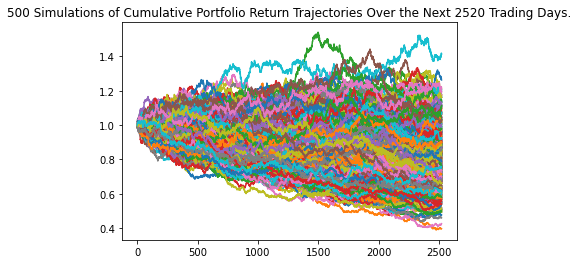

In [933]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
mc_2080_line_plot = mc_2080_weight.plot_simulation()

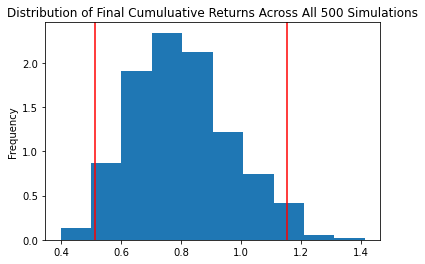

In [934]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
mc_2080_distribution_plot = mc_2080_weight.plot_distribution()

In [935]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
mc_2080_stats = mc_2080_weight.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE
print(mc_2080_stats)

count           500.000000
mean              0.801340
std               0.165590
min               0.397187
25%               0.684492
50%               0.781089
75%               0.903472
max               1.412401
95% CI Lower      0.511119
95% CI Upper      1.153258
Name: 2520, dtype: float64


C:\Users\jduke\OneDrive\Desktop\FinTech Challenge Starter Codes\module_5_challenge\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [936]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(f"The current balance of the stock and bond portion of the members portfolio is ${total_stocks_bonds}")

The current balance of the stock and bond portion of the members portfolio is $61018.2


In [938]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# YOUR CODE HERE
# YOUR CODE HERE
ci_lower_ten_cumulative_return = mc_2080_stats[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = mc_2080_stats[9] * total_stocks_bonds

# Print the result of your calculations
# YOUR CODE HERE
print(f" The lower `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio is ${ci_lower_ten_cumulative_return :.2f}")
print(f" The upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio is ${ci_upper_ten_cumulative_return :.2f}")

print(f"There is a 95% chance that investing the Stock/Bond portion of the portfolio (current value ${total_stocks_bonds:,.2f}) in a more aggressive 80/20 weight distribution over the next 10 years will result within the range of ${ci_lower_ten_cumulative_return:,.2f} and ${ci_upper_ten_cumulative_return:,.2f}.")

 The lower `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio is $31187.56
 The upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio is $70369.72
There is a 95% chance that investing the Stock/Bond portion of the portfolio (current value $61,018.20) in a more aggressive 80/20 weight distribution over the next 10 years will result within the range of $31,187.56 and $70,369.72.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [940]:
print(f"**Answer**: It is unlikely that the credit union members could retire after only 10 years. Their current monthly income need of $12,000, there is a 95% probability that the credit union members would only have enough in the stock and bond portfolio to survive for approximately 5.86 months.")

**Answer**: It is unlikely that the credit union members could retire after only 10 years. Their current monthly income need of $12,000, there is a 95% probability that the credit union members would only have enough in the stock and bond portfolio to survive for approximately 5.86 months.
